In [1]:
!pip install talib-binary


     |████████████████████████████████| 2.4 MB 6.7 MB/s 


In [2]:
# Import libaries
import talib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [3]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving TSLA.csv to TSLA.csv


In [4]:
# Store the data into a frame
df = pd.read_csv("TSLA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-09,855.119995,859.799988,841.750000,849.460022,849.460022,15157700
1,2021-02-10,843.640015,844.820007,800.020020,804.820007,804.820007,36216100
2,2021-02-11,812.440002,829.880005,801.729980,811.659973,811.659973,21622800
3,2021-02-12,801.260010,817.330017,785.330017,816.119995,816.119995,23768300
4,2021-02-16,818.000000,821.000000,792.440002,796.219971,796.219971,19802300


In [5]:
# Display last 5 stock prices
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
249,2022-02-03,882.000000,937.000000,880.520020,891.140015,891.140015,26285200
250,2022-02-04,897.219971,936.500000,881.169983,923.320007,923.320007,24472600
251,2022-02-07,923.789978,947.770020,902.710022,907.340027,907.340027,20331500
252,2022-02-08,905.530029,926.289978,894.799988,922.000000,922.000000,16909700
253,2022-02-09,935.000000,946.269897,922.090027,932.000000,932.000000,17058908


In [6]:
# Return the length of the list
len(df)

254

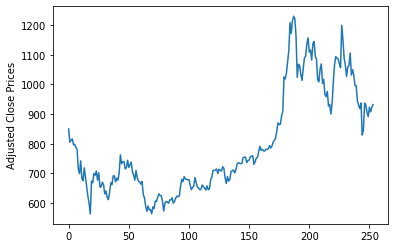

In [7]:
# Visualize historical stock price
df["Adj Close"].plot()
plt.ylabel("Adjusted Close Prices")
plt.show()

In [8]:
# By using talib library we get the moving average and RSI for adjusted stock prices in 10, 30, 60 and 100 days
val = []
for i in [10, 30, 60, 100]:
  df["ma" + str(i)] = talib.SMA(df['Adj Close'].values, timeperiod=i)
  df["rsi" + str(i)] = talib.RSI(df["Adj Close"].values, timeperiod=i)
  val = val + [ "ma" + str(i), "rsi" + str(i)]

In [9]:
# Use pct_change method to calculate the daily volume change percentage
df["Volume Change"] = df["Volume"].pct_change()
volume_features = ["Volume Change"]
val.extend(volume_features)

In [10]:
# By using method we predict Adjusted Stock price for the next 15 days 
df["15d_future_close"] = df["Adj Close"].shift(-15)
df["15d_close_future_pct"] = df["15d_future_close"].pct_change(15)

In [11]:
# Visualize the stock prices for next 15 days
df.head(15)

,Date,Open,High,Low,Close,Adj Close,Volume,ma10,rsi10,ma30,rsi30,ma60,rsi60,ma100,rsi100,Volume Change,15d_future_close,15d_close_future_pct
0,2021-02-09,855.119995,859.799988,841.750000,849.460022,849.460022,15157700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,653.200012,NaN
1,2021-02-10,843.640015,844.820007,800.020020,804.820007,804.820007,36216100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.389287,621.440002,NaN
2,2021-02-11,812.440002,829.880005,801.729980,811.659973,811.659973,21622800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.402951,597.950012,NaN
3,2021-02-12,801.260010,817.330017,785.330017,816.119995,816.119995,23768300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.099224,563.000000,NaN
4,2021-02-16,818.000000,821.000000,792.440002,796.219971,796.219971,19802300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.166861,673.580017,NaN
5,2021-02-17,779.090027,799.840027,762.010010,798.150024,798.150024,25996500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.312802,668.059998,NaN
6,2021-02-18,780.900024,794.690002,776.270020,787.380005,787.380005,17957100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.309249,699.599976,NaN
7,2021-02-19,795.000000,796.789978,777.369995,781.299988,781.299988,18958300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.055755,693.729980,NaN
8,2021-02-22,762.640015,768.500000,710.200012,714.500000,714.500000,37269700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965878,707.940002,NaN
9,2021-02-23,662.130005,713.609985,619.000000,698.840027,698.840027,66606900,785.845001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.787160,676.880005,NaN


In [12]:
# Splitt the data into training set and test set

# Remove null values from dataframe
df.dropna(inplace=True)

x = df[val]
y = df["15d_close_future_pct"]

# Set our training set to 85%
train_size = int(0.85 * y.shape[0])
x_train = x[:train_size]
y_train = y[:train_size]
x_test = x[train_size:]
y_test = y[train_size:]

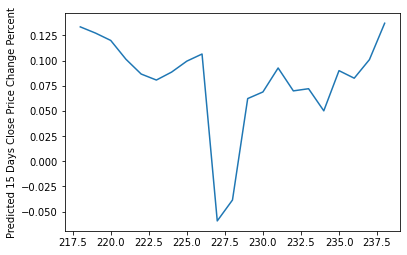

In [13]:
# Using the test set we predict the price change for 15 days
f_model = RandomForestRegressor(n_estimators=128, max_depth=8, max_features=4, random_state=16)
f_model.fit(x_train, y_train)
y_pred = f_model.predict(x_test)
y_pred_series = pd.Series(y_pred, index=y_test.index)
y_pred_series.plot()
plt.ylabel("Predicted 15 Days Close Price Change Percent")
plt.show()

In [14]:
# Calculate MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.18058379388921528
Root Mean Squared Error: 0.1911610226740151
